
     爬取的是新浪财经《中国年轻人正带领国家走向危机？》评论区的全部评论,并对其内容进行分析，创建用户画像，分析评论用户的地域分布、设备偏好、热度等信息。
 

# 确认目标

- 首先点开文章[《中国年轻人正带领国家走向危机？》](http://finance.sina.com.cn/stock/usstock/c/2018-08-07/doc-ihhkuskt2879316.shtml)，拉到评论区，点击“查看全部XXXX条评论”，在新的页面处，一直下滑就可以一直加载出评论数据。
- 打开检查模式，依次点击,network-all-preview，点击 "network" >> 点"All" >> 多次点击加载评论>>观察name中重复加载的内容，
- 并结合“previw”，确定下前者就是爬虫入口的 url，基本信息如下：
    - Request URL:http://comment.sina.com.cn/page/info?version=1&format=json&channel=cj&newsid=comos-hhkuskt2879316&group=0&compress=0&ie=utf-8&oe=utf-8&page=1&page_size=10&t_size=3&h_size=3&thread=1&uid=unlogin_user&callback=jsonp_1589204387553&_=1589204387553
    - Request Method:GET
    - Status Code:200 ok
    - Remote Address:39.156.6.179:80
    - Referrer Policy:unsafe-url
- 多次加载评论，观察Request URL的变化可以看出，仅参数`page=1`和`=jsonp_1589204387553&_=1589204387553`在变化；容易得出page代表页数，`page_size=10`代表10个评论为1页；
- `jsonp_1589204387553&_=1589204387553`中的数字为时间戳，通过以下代码可转化为标准时间：

In [15]:
import time
commentTime = 1589204387553 # 13 位，单位ms，一般是 10 位，单位s。
print(commentTime)
print(int(time.time()))
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(commentTime/1000)))

1589204387553
1594118544
2020-05-11 21:39:47


# 爬取数据
- 获取到URL后，先尝试获取第一页数据

In [39]:
import time
import requests
import json
page = 1
time_stamp = int(time.time()*1000)
url = 'http://comment.sina.com.cn/page/info?version=1&format=json&channel=cj&newsid=comos-hhkuskt2879316&group=0&compress=0&ie=utf-8&oe=utf-8&page={}&page_size=10&t_size=3&h_size=3&thread=1&uid=unlogin_user&callback=jsonp_{}&_={}'.format(page, time_stamp, time_stamp)
r = requests.get(url).text
print(r)

jsonp_1594126600735({"result": {"status": {"msg": "", "code": 0}, "count": {"thread_show": 6, "qreply": 23404, "qreply_show": 8, "total": 34385, "show": 3886}, "language": "ch", "top_thread": {}, "encoding": "utf-8", "cmntlist": [{"comment_imgs": "", "code": "0", "show_loc": "1", "parent_mid": "0", "news_mid_source": "0", "layer": "0", "rank": "1", "mid": "5D3EDD90-DF59F238-16853C6F4-8C5-8B3", "parent_nick": "", "video": "", "thread2": "", "vote": "0", "uid": "6045288180", "area": "\u6cb3\u5357\u5546\u4e18", "channel_source": "", "content": "\u6211\u4e0d\u77e5\u9053\u4f60\u80fd\u4e0d\u80fd\u5e26\u9886\u56fd\u5bb6\uff0c\u4f46\u662f\u4f60\u5df2\u7ecf\u5728\u5f71\u54cd\u6211\u4e86\u3002", "nick": "\u96f6816\u53f7\u65e5\u8bb0\u672c", "hot": "0", "status_uid": "1746404695", "content_ext": {"reply": 0, "weibourl": "http://weibo.com/1746404695/GtF5bynjh"}, "ip": "223.89.242.56", "media_type": "0", "config": "wb_verified=0&wb_screen_name=\u96f6816\u53f7\u65e5\u8bb0\u672c&wb_cmnt_type=comment_r

- 从获取的数据可以看出，数据为json格式，需要将其转化为python可以处理的格式，去掉前20个无效字符`jsonp_1589205555068`和最后一个`)`后，剩下的就是我们需要的信息,我们将上一步获取的一部分数据打印出来：

In [41]:
# 随便练习
import time
import requests
import json
# page = 1
# time_stamp = int(time.time()*1000)
# url = 'http://comment.sina.com.cn/page/info?version=1&format=json&channel=cj&newsid=comos-hhkuskt2879316&group=0&compress=0&ie=utf-8&oe=utf-8&page={}&page_size=10&t_size=3&h_size=3&thread=1&uid=unlogin_user&callback=jsonp_{}&_={}'.format(page, time_stamp, time_stamp)
# r = requests.get(url).text
json_dict = json.loads(r[20:-1])
try:
    cmntlist = json_dict["result"]["cmntlist"]
except:
    pass
else:
    for num,cmnt in  enumerate(cmntlist):
        print(num, cmnt['nick'],cmnt['area'], cmnt['ip'], cmnt['time'], cmnt['content'], cmnt['rank']) 

0 零816号日记本 河南商丘 223.89.242.56 2019-07-29 19:50:41 我不知道你能不能带领国家，但是你已经在影响我了。 1
1 不想理你鸭 江苏南通 58.241.166.50 2019-06-26 11:44:33 为啥三年？两年免增值税 0
2 托比托 河南洛阳 61.54.44.251 2019-06-26 11:24:26 幸好我不用还房贷，不然一个月2500会让我睡不着觉的。 0
3 海棠猫张小宝 甘肃兰州 42.90.91.3 2019-06-26 11:22:46 我房贷每月两千五，三十年。要不你让银行把房子收走，我不买了 0
4 影片道具女神水 福建福州 218.85.43.208 2019-06-23 20:22:17 脑子是个好东西，希望你也有 0
5 幸福平安快乐53770 山西太原 223.12.236.50 2019-04-09 11:07:24 宝宝，冷静点啊 0
6 鲍鲍BOBO新家 广东 223.104.63.98 2018-10-09 07:22:56 上一辈，努力挣钱买房是上一辈的事 下一辈不积谷防饥，是下一辈的事 只要下一辈不厚着脸皮问上一辈要婚房结婚，不理所当然认为房子是父母该送给你们的，就可以了 0
7 严家可爱豆 江西南昌 59.63.206.200 2018-08-28 22:05:46 哈哈 0
8 顾小慢Catherine 重庆 123.147.248.51 2018-08-28 19:23:37 爸爸妈妈买房，说啃老。自己不买房，说没上进心。不生娃，说是自私。那是因为大部分90后的我们真的不富裕，没法一下子拿出几十百万买房子。这也会被说，为什么不努力工作？[皱眉]要我们怎样？ 10
9 顾小慢Catherine 重庆 123.147.248.51 2018-08-28 19:23:25 80后买不起房，90后不想买房。 连交通信息卡都发的信用卡，现在又怪我们借贷过度，没有辛苦攒钱？ 我们努力工作，熬成秃头，辛辛苦苦赚钱想用用智能机，想旅旅游，也错了？不想辛辛苦苦攒钱还房贷，也错了？ 8


- 接下来就是将所有评论爬取下来，并保存在.csv格式的文件中。由于前期还不能确定哪些数据有用，建议将所有数据都存储起来

In [28]:
import time
import requests
import json
import pandas as pd
import random
import os

save_time = time.strftime("%Y%m%d_%H%M%S", time.localtime(time.time()))
#用os模块来获取当前路径
curpath=os.getcwd()
csv_path=curpath + r'\99 cache\50-Sina_{}.csv'.format(save_time)
print(csv_path)
# 创建DataFrame,并将行标题写入.csv文件中
comments = pd.DataFrame(columns = ['page','content'])
comments.to_csv(csv_path,mode='w',index= False, header=['page','content'], encoding='utf-8')
for page in range(1,390):
    time_stamp = int(time.time()*1000)
    url = 'http://comment.sina.com.cn/page/info?version=1&format=json&channel=cj&newsid=comos-hhkuskt2879316&group=0&compress=0&ie=utf-8&oe=utf-8&page={}&page_size=10&t_size=3&h_size=3&thread=1&uid=unlogin_user&callback=jsonp_{}&_={}'.format(page, time_stamp, time_stamp)
    try:
        r = requests.get(url).text
        json_dict = json.loads(r[20:-1])
        # 追加写入，忽略行列标志
        comments = pd.DataFrame({'page':page,'content':json_dict})
        comments.to_csv(csv_path,mode='a',index= False, header=False, encoding='utf-8')
#         print('page:',page)
    except Exception as e:
        print('{}页提取异常:{}'.format(page,e))
        break
    time.sleep(random.randint(0,10)) # 每页随机停0-5秒，作为简单的防反爬的一步


D:\File  Work File\JupyterProjects  Python  Python基础\99 cache(-Sina_20200707_184943.csv


# 处理数据

## 提取有效数据

    上一节我们获得了该文章的全部评论数据，包括一系列数据，接下来就是选取我们需要的信息，出去无效信息


In [30]:
import pandas as pd
import ast

raw_data = pd.read_csv(csv_path)
# print(raw_data)
list_content = raw_data['content']
p = 1

# filtered_data =(columns={'nick','area','ip','time','content','agree','usertype'})
filtered_list = []
filter_fail_list = []
for page_content in list_content:
    try:
        page_dict = ast.literal_eval(page_content)
        cmntlist = page_dict['cmntlist']
    except Exception as e:
        filter_fail_list = filter_fail_list + [p]
    else:
        for num,cmnt in  enumerate(cmntlist):
            new_data ={
                'page':p,
                'nick':cmnt['nick'],
                'area':cmnt['area'],
                'ip':cmnt['ip'],
                'time':cmnt['time'],
                'content':cmnt['content'],
                'agree':cmnt['agree'],
                'rank':cmnt['rank'],
                'usertype':cmnt['usertype']
                }
            filtered_list.append(new_data)
    p = p + 1
filtered_data = pd.DataFrame(filtered_list,columns=['page','nick','area','ip','time','content','agree','rank','usertype'])
filter_path = curpath+r'\99 cache/50-Sina_filtered_data.csv'
filtered_data.to_csv(filter_path)
print('解析完成，以下页面解析失败：{}'.format(filter_fail_list))

解析完成，以下页面解析失败：[21, 38, 41, 52, 61, 73, 81, 82, 93, 94, 95, 96, 101, 117, 121, 131, 141, 150, 161, 170, 181, 193, 201, 211, 221, 231, 241, 242, 253, 261, 272, 281, 291, 300, 301, 314, 321, 322, 323, 326, 331, 332, 338, 341, 342, 354, 361, 375, 381]


## 分析数据

- 绘制点赞分布图，并打印出前十个点赞高的

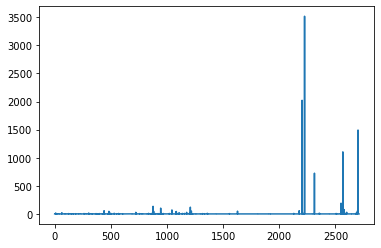

2225                    笑死了，我工作辛苦买不起房子，还不允许我买星巴克 买包 旅游了？？
2203                     庞大债务貌似不是什么狗屁智能手机、大牌衣服、星巴克咖啡馆造成的吧
2701                                         我日，这锅是硬砸在头上了
2566                      不然呢？非要学上一代那样上半辈子卖命挣钱，下半辈子花钱买命吗？
2313    开始怪年轻人的消费观念了？银行滥发信用卡，你现在怪我消费观？房价高的离谱，必须贷款买，你告诉...
2550                                          你只想让我攒钱买房哦？
876                           “你们应该把钱攒着买房 吃馒头咸菜就行了要啥业余活动”
1208                                    我可真牛逼 我还想带领人类走向毁灭
944                 想要新手机大牌衣服天天星巴克嘛？！！你只要不买房就可以做到啦！！！！！！！
2567    现在买房的大部分都是年青人，只是有的人买的起，有的人买不起，都在同一个屋檐下，买不起房怪国家...
Name: content, dtype: object


In [31]:
from matplotlib import pyplot as plt
import pandas as pd
filtered_data = pd.read_csv(filter_path)
plt.figure(1)
plt.plot(filtered_data['agree'])
plt.show()
a = filtered_data.sort_values(['agree'],ascending=False).head(10)['content']
print(a)

- 统计使用的设备类型及数量

wb          2676
pc            19
wap            7
palmnews       5
Name: usertype, dtype: int64


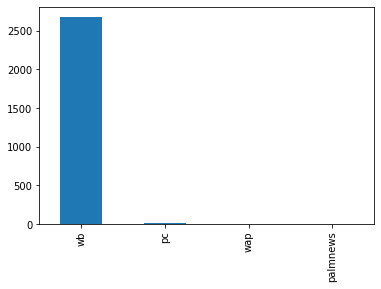

In [32]:
b = filtered_data.loc[:,'usertype'].value_counts()
print(b)
b.plot(kind='bar')

北京       243
上海       198
广东广州     119
四川成都     100
广东深圳      92
        ... 
湖南株洲       1
瑞士         1
澳门         1
山东菏泽       1
安徽马鞍山      1
Name: area, Length: 311, dtype: int64


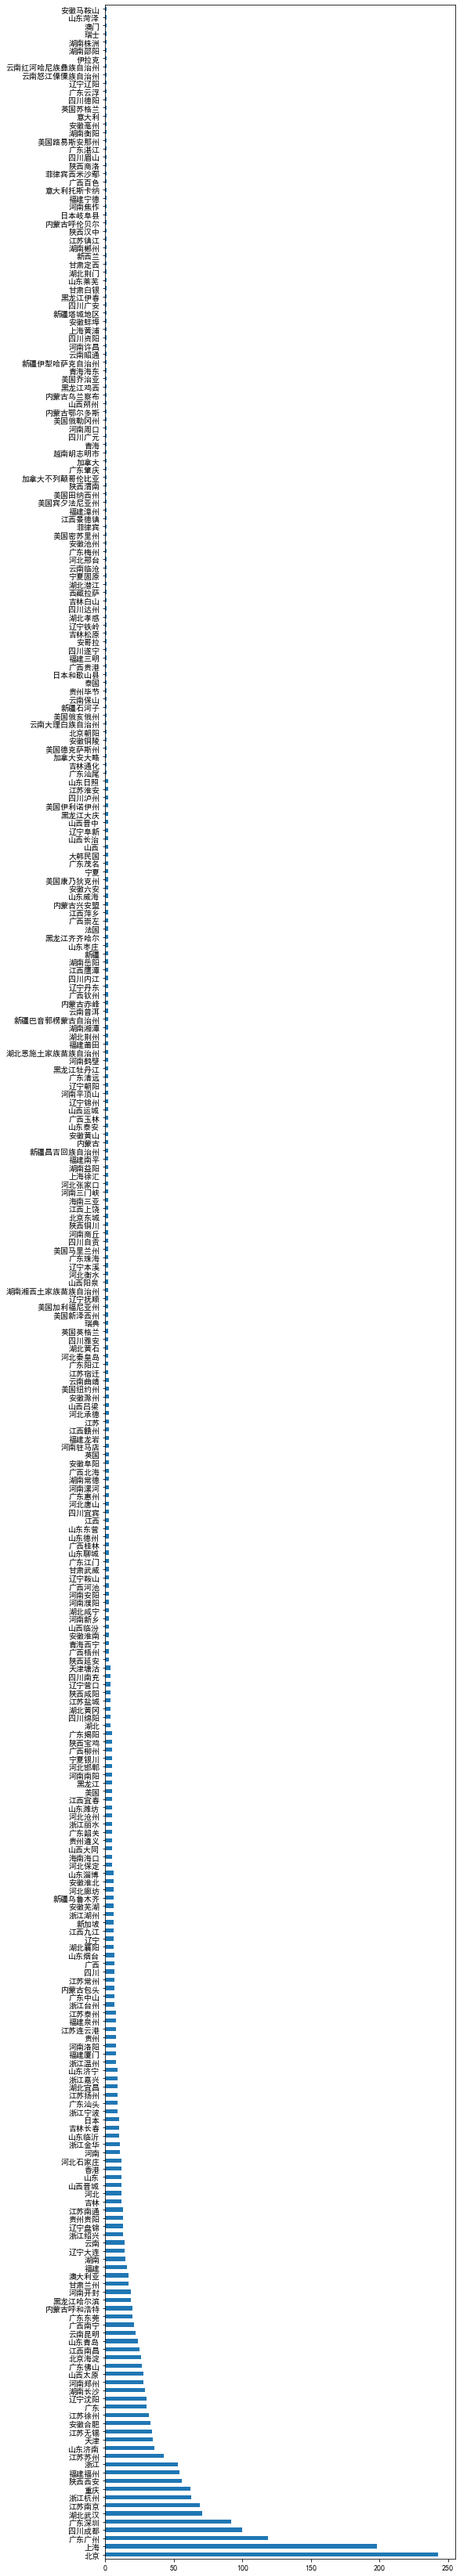

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
fig = plt.figure(figsize=(8,60))
c = filtered_data.loc[:,'area'].value_counts()
print(c)
c.plot(kind='barh')

In [37]:
# 随便练习  读取某一页数据
import time
import requests
import json
page = 21
time_stamp = int(time.time()*1000)
url = 'http://comment.sina.com.cn/page/info?version=1&format=json&channel=cj&newsid=comos-hhkuskt2879316&group=0&compress=0&ie=utf-8&oe=utf-8&page={}&page_size=10&t_size=3&h_size=3&thread=1&uid=unlogin_user&callback=jsonp_{}&_={}'.format(page, time_stamp, time_stamp)
r = requests.get(url).text
json_dict = json.loads(r[20:-1])
try:
    cmntlist = json_dict["result"]["cmntlist"]
except:
    pass
else:
    for num,cmnt in  enumerate(cmntlist):
        print(num, cmnt['nick'],cmnt['area'], cmnt['ip'], cmnt['time'], cmnt['content'], cmnt['rank']) 

0 李鸡肋 广东广州 119.34.206.33 2018-08-09 09:04:20 老是写这些无脑文章怕是故意找骂吧 0
1 SKY-蓝天 广东广州 119.130.120.47 2018-08-09 09:03:44 还要脸不？ 1
2 Max的旧货店 安徽合肥 36.60.129.107 2018-08-09 09:01:16 真是恶心 0
3 垃圾筐与电影院 四川成都 222.212.88.71 2018-08-09 08:55:27 有个研究显示，70后智商是持续下降的。 0
4 刚马甲 上海 211.136.126.10 2018-08-09 08:49:28 呵 商品经济炒作挖坑哄年轻人消费生孩子还不是你们上一辈正在做的 1
5 大着肚子做B超 江苏常州 223.104.145.254 2018-08-09 08:42:45 哈哈哈。把锅甩给年轻人了。厉害 0
6 amie是佳妹儿 四川成都 110.188.59.203 2018-08-09 08:41:21 但直觉告诉我之后钱会越来越是钱，勒紧裤腰带多存点吧 0
7 Just-sosoul 河南开封 61.158.146.87 2018-08-09 08:37:36 我是来看评论的 0
8 陶慕白zz 北京 223.104.254.16 2018-08-09 08:35:20 我去年买了个登山包超耐磨[二哈][二哈][二哈] 0
9 群租房mvp 广东广州 112.96.195.200 2018-08-09 08:32:03 当初不是你们让我们掏空3个钱包买房的？[费解][费解][费解][费解] 0
